## Perspective on Computational Research 
## HW 03— Part 2
## Sanittawan Nikki Tan

### Part 2 - Design a visualization

Your assignment is to design a static visualization (i.e. a single image) that effectively communicates a data-driven story and provide a written explanation (approximately 500-750 words) describing your design. You should use any dataset you choose, making necessary transformations and summarizations as appropriate. The visualization should be interpretable without reference to your written explanation, so be sure to include all the necessary components (e.g. title, axis labels, legends).

In [1]:
import pandas as pd
import numpy as np
from string import capwords


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
bmr = pd.read_csv('./data/bmr_democracy-v3.0.csv')

In [3]:
bmr['country'] = bmr['country'].apply(lambda x: capwords(x.strip().lower()))

In [4]:
bmr.columns

Index(['country', 'ccode', 'abbreviation', 'abbreviation_undp', 'year',
       'BMR_democracy', 'BMR_democracy_trans', 'BMR_democracy_breakdowns',
       'BMR_democracy_duration', 'democracy_omitteddata',
       'democracy_femalesuffrage'],
      dtype='object')

In [6]:
bmr['year'] = pd.to_datetime(bmr['year'], format='%Y').dt.year

### Number of democratic breakdowns

In [10]:
bmr_bd = bmr[bmr['year'] == 2015]

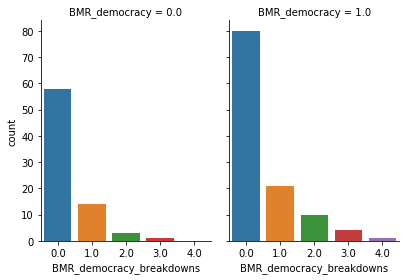

In [11]:
# This is just for exploratory purpose; Please do not grade.
g = sns.catplot(x="BMR_democracy_breakdowns", col="BMR_democracy",
                data=bmr_bd, kind="count",
                height=4, aspect=.7);

### Number of breakdowns and transitions to democracy

In [12]:
# check for NaNs
bmr['BMR_democracy_trans'].unique()

array([ 0.,  1., -1., nan])

In [14]:
filter1 = ['country', 'year', 'BMR_democracy_trans']
bmr_trans = bmr[filter1]

In [15]:
# drop NaNs
bmr_trans = bmr_trans.dropna()

In [16]:
bmr_trans['transition_occurs'] = 0

In [17]:
# set condition. If no transition occurs, the new column has the value of 0
condition = bmr_trans['BMR_democracy_trans'] == 0.0

In [18]:
# replace values
bmr_trans.loc[condition, 'transition_occurs'] = 0

In [19]:
# replace values
bmr_trans.loc[~condition, 'transition_occurs'] = 1

#### Result 1 - Total transitions (to democracy + democratic breakdowns)

In [23]:
total_trans = bmr_trans.groupby(['year'])['transition_occurs'].sum()

In [26]:
total_trans.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7, 10])

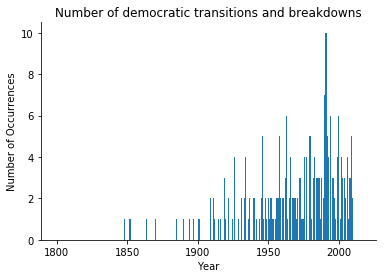

In [35]:
# Test plot; our final plot should look something like this
plt.bar(total_trans.index, total_trans.values)
plt.title('Number of democratic transitions and breakdowns')
plt.xlabel('Year')
plt.ylabel('Number of Occurrences')
sns.despine();

#### Result 2 - Separating Number of Breakdowns and Number of Transitions to Democracy

In [36]:
dummies = pd.get_dummies(bmr_trans['BMR_democracy_trans'], prefix='trans_')

In [37]:
bmr_trans_final = pd.concat([bmr_trans, dummies], axis=1)

In [39]:
bmr_trans_final.head(3)

,country,year,BMR_democracy_trans,transition_occurs,trans__-1.0,trans__0.0,trans__1.0
0,United States Of America,1800,0.0,0,0,1,0
1,United States Of America,1801,0.0,0,0,1,0
2,United States Of America,1802,0.0,0,0,1,0


In [40]:
bmr_trans_final.rename(index=str, columns={"trans__-1.0": "num_breakdowns",
                               "trans__0.0":"num_nochange",
                               "trans__1.0": "num_todem"}, inplace=True)

In [41]:
bmr_trans_final.head(3)

,country,year,BMR_democracy_trans,transition_occurs,num_breakdowns,num_nochange,num_todem
0,United States Of America,1800,0.0,0,0,1,0
1,United States Of America,1801,0.0,0,0,1,0
2,United States Of America,1802,0.0,0,0,1,0


**Number of breakdowns per year**

In [42]:
num_breakdowns_year = bmr_trans_final.groupby(['year'])['num_breakdowns'].sum()

In [43]:
num_breakdowns_year.unique()

array([0, 1, 3, 2, 4], dtype=uint64)

**Number of transitions to democracy per year**

In [45]:
num_to_dem_year = bmr_trans_final.groupby(['year'])['num_todem'].sum()

In [46]:
num_to_dem_year.unique()

array([0, 1, 2, 3, 5, 4, 9], dtype=uint64)

**Plotting the final visualization** (Please grade this plot)

In [56]:
from matplotlib.ticker import AutoLocator
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import FixedLocator

AxesSubplot(0.125,0.69125;0.775x0.18875)
AxesSubplot(0.125,0.408125;0.775x0.18875)
AxesSubplot(0.125,0.125;0.775x0.18875)


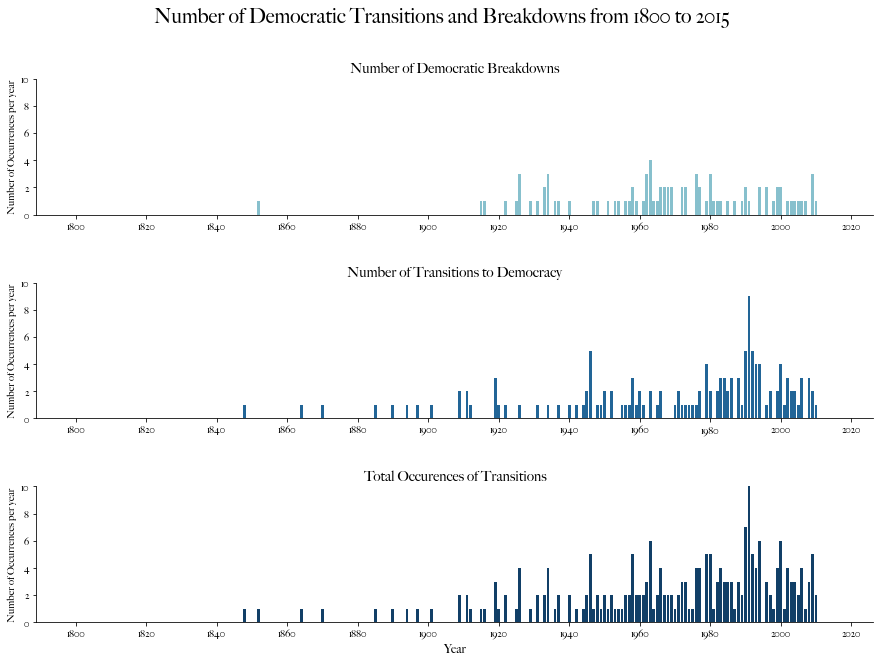

In [86]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Number of Democratic Transitions and Breakdowns from 1800 to 2015',
             fontsize=20, fontname='Big Caslon')

data_list = [num_breakdowns_year, num_to_dem_year, total_trans]
subtitles = ['Number of Democratic Breakdowns',
             'Number of Transitions to Democracy',
             'Total Occurences of Transitions']
colors = ['#87c0cd', '#226597', '#113f67']
# colors = ['#ee4540', '#c72c41', '#801336'] 
i = 0

for ax, data, st, c in zip(axes.flatten(), data_list, subtitles, colors):
    i += 1
    print(ax)
    ax.set(ylim=(0, 10))
    ax.bar(data.index, data.values, color=c)
    ax.xaxis.set_major_locator(MaxNLocator(15))
    ax.set_title(st, fontname='Big Caslon', fontsize=14)
    if i == 3:
        ax.set_xlabel('Year', fontname='Big Caslon', fontsize=12)
    ax.set_ylabel('Number of Occurrences per year', fontname='Big Caslon', fontsize=10)
    sns.despine()
    
    for tick in ax.get_xticklabels():
        tick.set_fontname('Big Caslon')
    for tick in ax.get_yticklabels():
        tick.set_fontname('Big Caslon')

plt.savefig('transitions.png', dpi=300, bbox_inches='tight')
plt.show()

In your written explanation, be sure to rigorously defend your design choices. This includes (but is not limited to):

* What is the story?
* Why did you select this graphical form?
* Why did you use each channel to encode the data (e.g. spatial position, size, color, scale)?
* How do these decisions facilitate effective communication?

[Is it truthful?
Is it functional?
Is it beautiful?
Is it insightful?
Is it enlightening?]

References:
1. http://jonathansoma.com/lede/data-studio/matplotlib/changing-fonts-in-matplotlib/
2. http://jonathansoma.com/lede/data-studio/matplotlib/list-all-fonts-available-in-matplotlib-plus-samples/
3. https://medium.com/@rayheberer/generating-matplotlib-subplots-programmatically-cc234629b648
4. https://flynn.gg/blog/better-matplotlib-charts/